# OCT2017 DATASET


### Data Stucture

In [1]:
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Set your dataset path
dataset_path = r"C:\Users\16172\Desktop\OCT2017"

# Paths to training and testing directories
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

# Function to count number of files (images) in each class folder
def count_images_by_class(path):
    counts = {}
    for class_name in os.listdir(path):
        class_dir = os.path.join(path, class_name)
        if os.path.isdir(class_dir):
            counts[class_name] = len(os.listdir(class_dir))
    return counts

# Get counts
train_counts = count_images_by_class(train_path)
test_counts = count_images_by_class(test_path)

# Create dataframes
train_df = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Train Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Class', 'Test Count'])

# Merge the dataframes on 'Class'
summary_df = pd.merge(train_df, test_df, on='Class')

# Display the summary
print(summary_df)

    Class  Train Count  Test Count
0     CNV        33485         250
1     DME        10214         250
2  DRUSEN         7755         250
3  NORMAL        23684         250


### Summary Statistics Interpretation

#### Train Set:
- The training set contains 4 classes: CNV, DME, DRUSEN, and NORMAL.
- The `mean` number of samples per class is approximately **20,871**, but the `std` (standard deviation) is quite high at **13,382**, telling us theres a significant **class imbalance**.
- The **smallest class**, DRUSEN, has **8,616** images, while the **largest class**, CNV, has **37,205**.
- This imbalance could negatively affect model performance, especially for underrepresented classes.

#### Test Set:
- The test set is **perfectly balanced**, with each class containing exactly **250 samples**.
- `std = 0` confirms there is **no variation** in sample counts across classes.
- A balanced test set is good for evaluating model performance fairly across all classes.

#### Conclusion:
- Special care should be taken during training to handle the imbalance in the training set, possibly through **data augmentation**, **class weighting**, or **resampling techniques**.

In [2]:
print("Train Set Summary Statistics:")
print(train_df.describe())

print("Test Set Summary Statistics:")
print(test_df.describe())

Train Set Summary Statistics:
        Train Count
count      4.000000
mean   18784.500000
std    12044.544284
min     7755.000000
25%     9599.250000
50%    16949.000000
75%    26134.250000
max    33485.000000
Test Set Summary Statistics:
       Test Count
count         4.0
mean        250.0
std           0.0
min         250.0
25%         250.0
50%         250.0
75%         250.0
max         250.0


#### There are no missing values

In [3]:
import pandas as pd

# Check for missing values in summary_df
print("Missing values in summary table:")
print(summary_df.isnull().sum())


Missing values in summary table:
Class          0
Train Count    0
Test Count     0
dtype: int64


### Image Dimensions 
Height is consistent (496–512 px), which simplifies preprocessing.

Width varies significantly, from 384 px to 1536 px.

Most images have standard sizes around 512x496 (median), but outliers exist (wider images).

This variation in width may require resizing or cropping before feeding into models.

In [4]:
def get_image_sizes(split):
    sizes = []
    split_path = os.path.join(dataset_path, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        for fname in os.listdir(cls_path):
            fpath = os.path.join(cls_path, fname)
            img = Image.open(fpath)
            sizes.append(img.size)
    return sizes

# Image sizes from both train and test sets
train_sizes = get_image_sizes('train')
test_sizes = get_image_sizes('test')
all_sizes = train_sizes + test_sizes

# Convert to DataFrame for summary
sizes_df = pd.DataFrame(all_sizes, columns=['Width', 'Height'])

# Display summary
print("Image size summary:")
print(sizes_df.describe())



Image size summary:
              Width        Height
count  76138.000000  76138.000000
mean     680.058630    498.920802
std      304.180654      6.180797
min      384.000000    496.000000
25%      512.000000    496.000000
50%      512.000000    496.000000
75%      768.000000    496.000000
max     1536.000000    512.000000


### No Duplicates

In [5]:
import os

def find_duplicate_filenames(folder_path):
    seen = []
    duplicates = []

    # Go through each class folder like CNV, DME.. 
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)

        # Skip anything that isn't a folder
        if not os.path.isdir(class_path):
            continue

        # Go through each image file
        for file_name in os.listdir(class_path):
            if file_name in seen:
                duplicates.append(file_name)
            else:
                seen.append(file_name)

    return duplicates


# Check both train and test folders
train_duplicates = find_duplicate_filenames(os.path.join(dataset_path, 'train'))
test_duplicates = find_duplicate_filenames(os.path.join(dataset_path, 'test'))

print("Number of duplicate filenames in train:", len(train_duplicates))
print("Number of duplicate filenames in test:", len(test_duplicates))


Number of duplicate filenames in train: 0
Number of duplicate filenames in test: 0


## Visualizations - Bar Graphs
- Bar graph shows how the test set is perfectly balanced but theres a imbalance in the training set.
- Significantly lower data in the training set for DME and DRUSEN


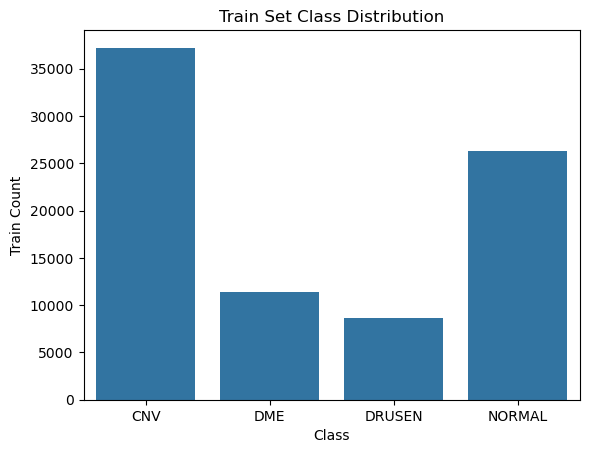

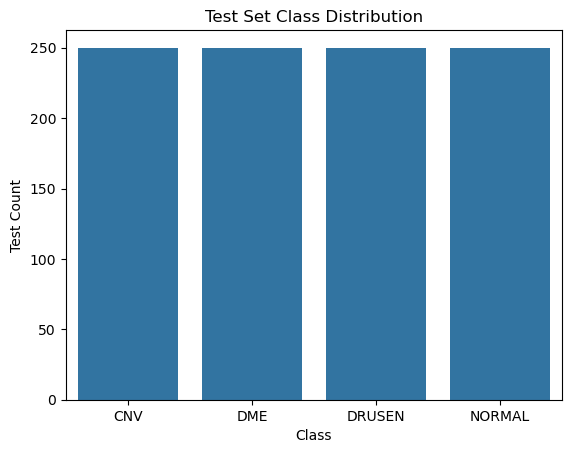

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=train_df, x='Class', y='Train Count')
plt.title('Train Set Class Distribution')
plt.show()

sns.barplot(data=test_df, x='Class', y='Test Count')
plt.title('Test Set Class Distribution')
plt.show()

## Left Chart: Histogram of Image Widths
- Most images have a width of 512 pixels, as seen by the tallest bar on the left.

- There are also clusters around widths like 768 and 1536.

## Right Chart: Histogram of Image Heights
- Almost all images have a height of 496 or 512 pixels, showing very little variation.

- The distribution is very narrow, which means height is almost fixed across the dataset.

- We will most likely only need to resize width 



Processing NORMAL: 100%|██████████| 23684/23684 [00:07<00:00, 3332.25it/s]


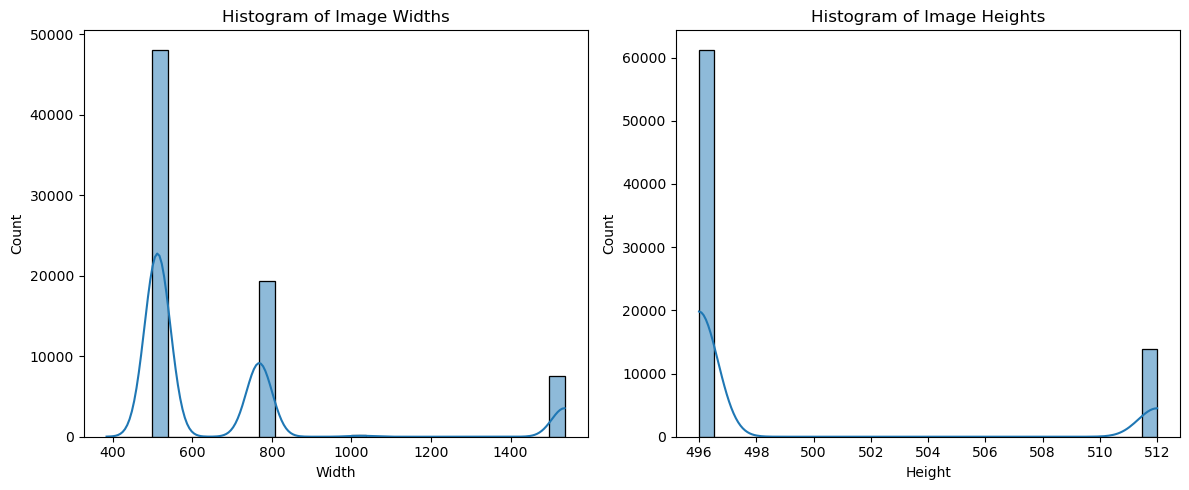

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
# Collect image dimensions (width, height)
image_shapes = []

train_path = os.path.join(dataset_path, 'train')


for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        for filename in tqdm(os.listdir(class_dir), desc=f"Processing {class_name}"):
            img_path = os.path.join(class_dir, filename)
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    image_shapes.append((w, h))
            except Exception as e:
                print(f"Error reading {img_path}: {e}")

# Create DataFrame for plotting
dim_df = pd.DataFrame(image_shapes, columns=['Width', 'Height'])

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(dim_df['Width'], kde=True, bins=30)
plt.title("Histogram of Image Widths")

plt.subplot(1, 2, 2)
sns.histplot(dim_df['Height'], kde=True, bins=30)
plt.title("Histogram of Image Heights")

plt.tight_layout()
plt.show()


# Show 5 (random) images per class


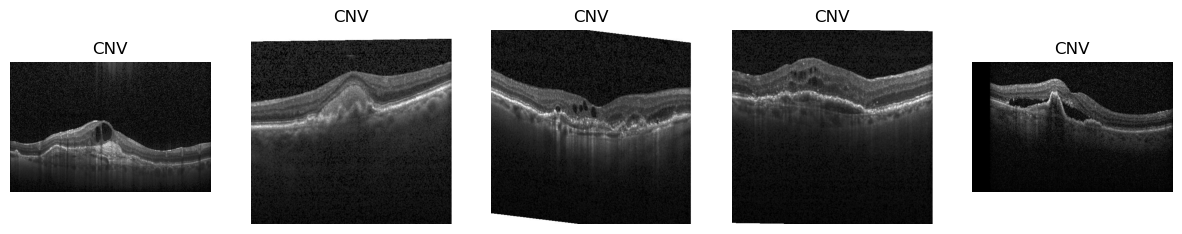

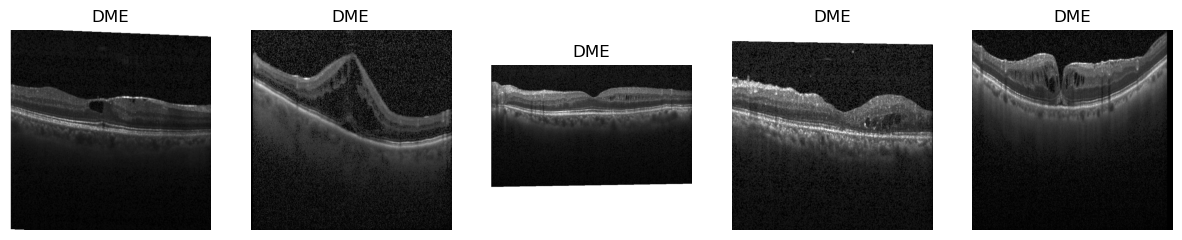

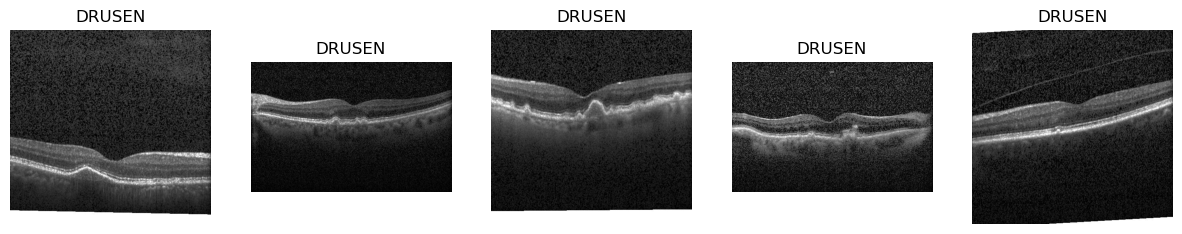

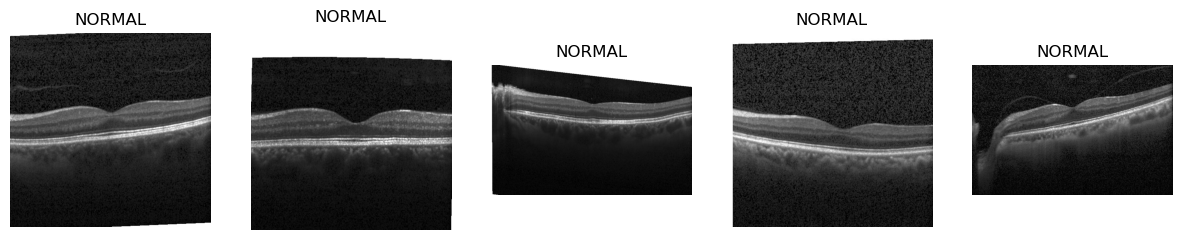

In [7]:
import random
from PIL import Image

def show_samples(path, label, n=5):
    files = os.listdir(os.path.join(path, label))
    samples = random.sample(files, n)
    fig, axs = plt.subplots(1, n, figsize=(15, 4))
    for i, file in enumerate(samples):
        img = Image.open(os.path.join(path, label, file))
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(label)
    plt.show()

for label in os.listdir(os.path.join(dataset_path, 'train')):
    show_samples(os.path.join(dataset_path, 'train'), label)

### Train, Validation, and Test Split

After visualizing the dataset and confirming the class distribution, we split our data to prepare it for model training.

- We started with the original training folder (`OCT2017/train`), which contains about 80% of the total dataset.
- We used an **80/20 split** on this training data to create:
  - **Training Set (70%)**
  - **Validation Set (10%)**

This way, we ensure that:
- The **training set** is used to fit the model.
- The **validation set** is used to monitor model performance and tune hyperparameters.
- The **test set**, which was already provided (`OCT2017/test`), is already balanced across all classes.

We resized all the images to the same size and applied some basic transformations like flipping and rotating (for training images only). Then, we used PyTorch’s DataLoader to group the images into batches, which helps the model train faster and more efficiently.


In [8]:
import os
import random
import shutil
from pathlib import Path

# Paths
base_path = r"C:\Users\16172\Desktop\OCT2017"
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')

# Create val directory
os.makedirs(val_dir, exist_ok=True)

random.seed(42) # same random results 

# Split each class folder
for class_name in os.listdir(train_dir):
    class_train_path = os.path.join(train_dir, class_name)
    class_val_path = os.path.join(val_dir, class_name)
    os.makedirs(class_val_path, exist_ok=True)

    # List all image files
    files = os.listdir(class_train_path)
    random.shuffle(files)

    # 10% for validation
    val_count = int(0.1 * len(files))
    val_files = files[:val_count]

    for file in val_files:
        src_path = os.path.join(class_train_path, file)
        dst_path = os.path.join(class_val_path, file)
        shutil.move(src_path, dst_path)

print(" val folder complete ")

 val folder complete 


### Image Resizing for VGG16 (224 x 224)

In this step, we resize all images in the dataset to **224x224 pixels**, which is the required input size for the **VGG16** model.

- We apply resizing to the `train`, `val`, and `test` folders.
- Resized images are saved to a new directory (`OCT2017_resized`) to preserve the original dataset.
- The folder structure (including class subfolders) is maintained in the resized dataset.
- Invalid or non-image files are safely skipped.
- This resizing prepares the dataset for input into standard pretrained CNN architectures.

**Note:** The original images remain unchanged. All resized images are saved separately to ensure safe preprocessing without data loss.


In [9]:
from PIL import Image
import os

def resize_images(input_dir, output_dir, target_size=(224, 224)):
    os.makedirs(output_dir, exist_ok=True)

    for cls in os.listdir(input_dir):
        cls_input_path = os.path.join(input_dir, cls)
        cls_output_path = os.path.join(output_dir, cls)

        # Skip non-directories
        if not os.path.isdir(cls_input_path):
            continue

        os.makedirs(cls_output_path, exist_ok=True)

        for fname in os.listdir(cls_input_path):
            input_path = os.path.join(cls_input_path, fname)
            output_path = os.path.join(cls_output_path, fname)

            try:
                with Image.open(input_path) as img:
                    img = img.resize(target_size)
                    img.save(output_path)  # Save resized image in new location
            except Exception as e:
                print(f"Skipped {input_path}: {e}")

# Base dataset paths
original_dataset_path = r"C:\Users\16172\Desktop\OCT2017"
resized_dataset_path = r"C:\Users\16172\Desktop\OCT2017_resized"

# Resize train, val, and test sets into new directory
resize_images(os.path.join(original_dataset_path, 'train'), os.path.join(resized_dataset_path, 'train'))
resize_images(os.path.join(original_dataset_path, 'val'), os.path.join(resized_dataset_path, 'val'))
resize_images(os.path.join(original_dataset_path, 'test'), os.path.join(resized_dataset_path, 'test'))

print("All images resized to 224x224 and saved in 'OCT2017_resized'. Originals preserved.")


All images resized to 224x224 and saved in 'OCT2017_resized'. Originals preserved.


### Data Augmentation

We applied basic data augmentation techniques to the training set to improve generalization. This included:

- **Horizontal Flip:** Randomly flips images  
- **Rotation:** Applies slight random rotations (10 degrees)  
- **Normalization:** Rescales image pixel values to a standard range  

Validation and test sets are **only** resized and normalized.

To address the imbalance in the training set, we applied a **WeightedRandomSampler** during data loading. This ensures that each class is more equally represented across training batches, without altering the original dataset size or duplicating samples.


In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
import torch
import os

# Base path for resized dataset
dataset_path = r"C:\Users\16172\Desktop\OCT2017_resized"

# Augmentation for training data only
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Basic transform for val and test
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Paths to resized folders
train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'val')
test_path = os.path.join(dataset_path, 'test')

# Datasets
train_dataset = datasets.ImageFolder(root=train_path, transform=train_transform)
val_dataset = datasets.ImageFolder(root=val_path, transform=base_transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=base_transform)

# --------------------------------------------
# Compute weights for each sample in train set
# --------------------------------------------
targets = train_dataset.targets  # list of class indices for each image
class_counts = torch.bincount(torch.tensor(targets))  # count per class
class_weights = 1.0 / class_counts.float()            # inverse frequency
sample_weights = [class_weights[label] for label in targets]  # assign per-sample weight
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# Loaders (balanced train loader using sampler)
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("✅ Applied WeightedRandomSampler using resized images in 'OCT2017_resized'.")


✅ Applied WeightedRandomSampler using resized images in 'OCT2017_resized'.


### Class Weights (for CrossEntropyLoss)
The loss function used is weighted CrossEntropyLoss to handle class imbalance, and we use the Adam optimizer for efficient training.


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Class counts from training data (must match class order in dataset)
class_counts = [37205, 11348, 8616, 26315]
total_samples = sum(class_counts)

# Compute inverse frequency weights
weights = [total_samples / c for c in class_counts]
class_weights = torch.FloatTensor(weights).to(device)

# Define weighted loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)

print("✅ Weighted loss and optimizer configured.")


✅ Weighted loss and optimizer configured.


In [13]:
import os

def count_images_by_class(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'val')
test_path = os.path.join(dataset_path, 'test')

print("Image counts after splitting:")
print("Train:", count_images_by_class(train_path))
print("Validation:", count_images_by_class(val_path))
print("Test:", count_images_by_class(test_path))

Image counts after splitting:
Train: {'CNV': 33485, 'DME': 10214, 'DRUSEN': 7755, 'NORMAL': 23684}
Validation: {'CNV': 7068, 'DME': 2155, 'DRUSEN': 1636, 'NORMAL': 4999}
Test: {'CNV': 250, 'DME': 250, 'DRUSEN': 250, 'NORMAL': 250}
